In [3]:
import pymatgen
import numpy as np
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import pymatgen.electronic_structure.plotter as esp
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
import sympy as sp
from IPython.display import FileLink

In [4]:
with MPRester("aeo5GUJ5RRpikp1p") as m:
    structure = m.get_structure_by_material_id("mp-961706")
    structure.to(filename = "TiSiPt.cif")
    writer = CifWriter(structure)
    writer.write_file("mp-961706.cif")
    bandstructure = m.get_bandstructure_by_material_id("mp-961706")
    print("Download .CIF file")
    display(FileLink("mp-961706.cif"))


Download .CIF file


/home/users/l/j/ljardine/mp-961706.cif


Bande interdite : 



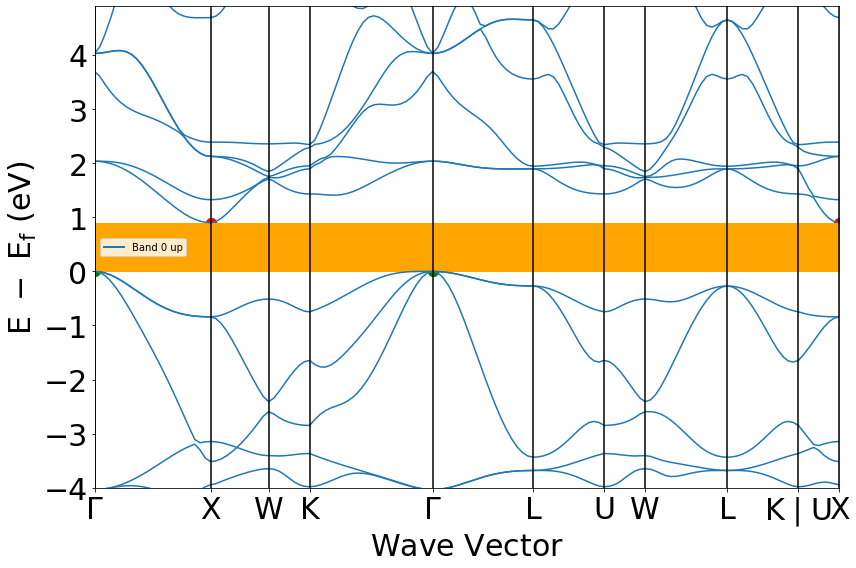

In [5]:
print("=============================================================\n")
print("Bande interdite : \n")
plotter = esp.BSPlotter(bandstructure)
plot = plotter.get_plot(vbm_cbm_marker=True)
data = plotter.bs_plot_data()
maxval = data['vbm'][0][1]
mincon = data['cbm'][0][1]
x = plotter.get_ticks()["distance"]
plot.fill_between(np.linspace(x[0],x[-1]),maxval,mincon,color='orange')
plot.show()

print("\n=============================================================")


In [6]:
#Bande interdite
print("=============================================================\n")
gap = bandstructure.get_band_gap()
if gap['direct'] == True:
    typegap = "directe"
else:
    typegap = "indirecte"
print ("Énergie de la bande interdite " +typegap+  " : " +str(gap['energy'])+ " eV")
print('Type de transition de bande : '+ str(gap['transition']))
print('Énergie de Fermi de la bande interdite: ', bandstructure.efermi)
print("\n=============================================================")



Énergie de la bande interdite indirecte : 0.9013 eV
Type de transition de bande : \Gamma-X
Énergie de Fermi de la bande interdite:  6.67934533



In [7]:


#Bandes de valence et conduction

#Liste de k points pour chaque bande
kpoints = bandstructure.kpoints 
vbmax = bandstructure.get_vbm() 
cbmax = bandstructure.get_cbm() 

#Dernière bande de valence et première bande de conduction
last = list(vbmax['band_index'].items())[0][1][-1] 
first = list(cbmax['band_index'].items())[0][1][0] 
print("=============================================================\n")

print('Dernière bande de valence =',last)
print('Première bande de conduction =', first)
print("\n=============================================================")




Dernière bande de valence = 11
Première bande de conduction = 12




Dernière bande de valence et Première bande de conduction : 



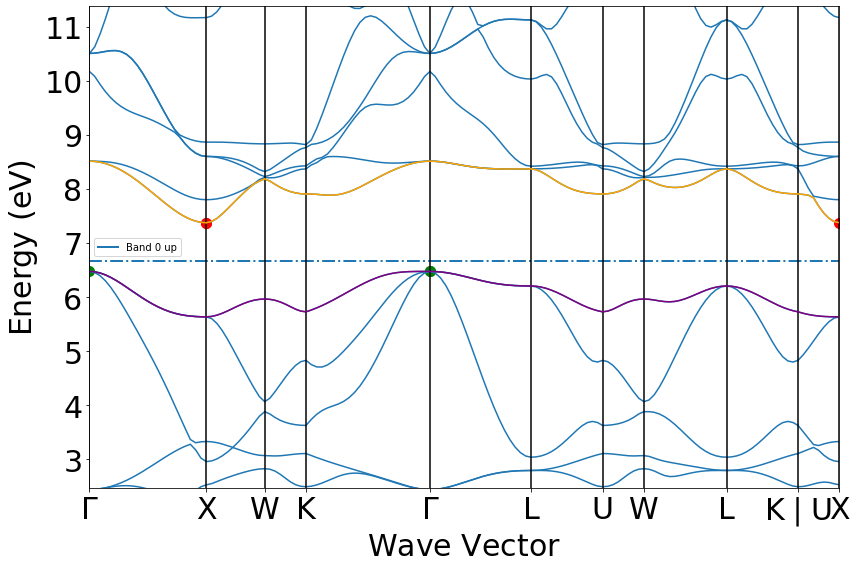

In [8]:
print("=============================================================\n")
print("Dernière bande de valence et Première bande de conduction : \n")

data = plotter.bs_plot_data(zero_to_efermi=False)

x = data.get('distances') 
y = data.get('energy').get('1') 
distances = data.get('ticks').get('distance') 
plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)

for i in range(len(x)):
    plt.plot(x[i],y[i][last],'purple')
    plt.plot(x[i],y[i][first],'orange')
plt.show()
print("\n=============================================================")


Direction des maxima et minima de la dispersion



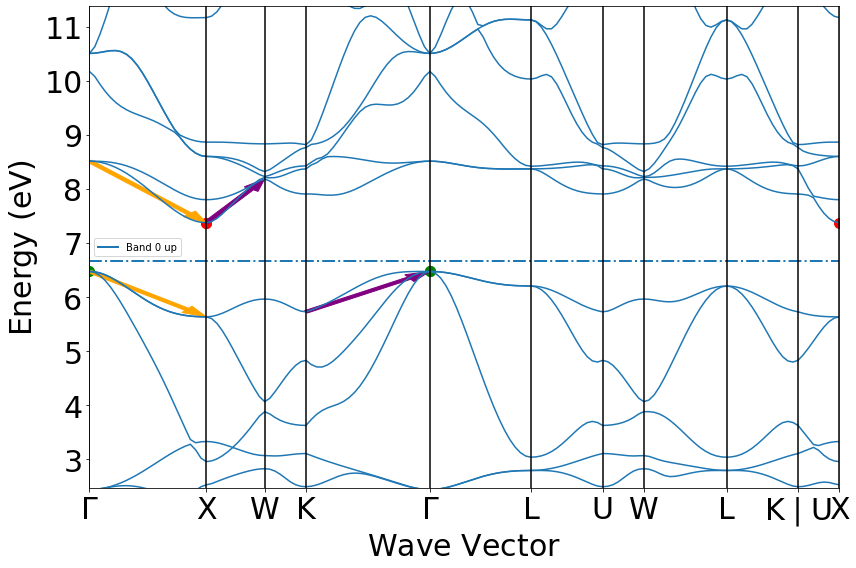

In [9]:
print("=============================================================\n")

print("Direction des maxima et minima de la dispersion\n")
disp_last = np.zeros(len(x))
disp_first = np.zeros(len(x))

for i in range(len(x)):
    disp_first[i] = (y[i][first][-1]-y[i][first][0])/(x[i][-1]-x[i][0])
    disp_last[i] = (y[i][last][-1]-y[i][last][0])/(x[i][-1]-x[i][0])

index_max_first = np.argmax(disp_first)
index_min_first = np.argmin(disp_last)
index_max_last = np.argmax(disp_last)
index_min_last = np.argmin(disp_last)

plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
plt.arrow(x[index_max_first][0], y[index_max_first][first][0], (x[index_max_first][-1]-x[index_max_first][0]), 
          (y[index_max_first][first][-1]-y[index_max_first][first][0]),color='purple',width = 0.05,length_includes_head =True )
plt.arrow(x[index_min_first][0], y[index_min_first][first][0], (x[index_min_first][-1]-x[index_min_first][0]), 
          (y[index_min_first][first][-1]-y[index_min_first][first][0]),color='orange',width = 0.05,length_includes_head =True )
plt.arrow(x[index_max_last][0], y[index_max_last][last][0], (x[index_max_last][-1]-x[index_max_last][0]), 
          (y[index_max_last][last][-1]-y[index_max_last][last][0]),color='purple',width = 0.05,length_includes_head =True )
plt.arrow(x[index_min_last][0], y[index_min_last][last][0], (x[index_min_last][-1]-x[index_min_last][0]), 
          (y[index_min_last][last][-1]-y[index_min_last][last][0]),color='orange',width = 0.05,length_includes_head =True )
plt.show() 
print("\n=============================================================")

In [11]:
print("=============================================================\n")

print("Calcul de la masse effective\n")

#Interpolation en supposant une dispersion parabolique 
ypara1 = np.array([y[3][first][0],y[4][first][0],y[5][first][0]])
ypara2 = np.array([y[3][last][0],y[4][last][0],y[5][last][0]])
xpara = np.array([x[3][0],x[4][0],x[5][0]])

poly1 = np.polyfit(xpara,ypara1,deg=2)
poly2 = np.polyfit(xpara,ypara2,deg=2)


#Masse effective
eV = 1.602e-19
h_ = (6.626e-34)/(2*np.pi*eV)
m_eff1 = h_**2/(2*abs(poly1[0]))
m_eff2 = h_**2/(2*abs(poly2[0]))
print("La masse effective à la base de la première bande de conduction vaut", m_eff1, "[kg].")
print("La masse effective au sommet de la dernière bande de valence vaut", m_eff2, "[kg].")
print("\n=============================================================")      


Calcul de la masse effective

La masse effective à la base de la première bande de conduction vaut 6.415930597896006e-31 [kg].
La masse effective au sommet de la dernière bande de valence vaut 4.6615234165564035e-31 [kg].

